In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Exercise H2.1: Connectionist Neuron


In [2]:
data_all = pd.read_csv("applesOranges.csv", delimiter=",")
print(data_all)

       x.1    x.2  y
0    0.365  0.708  0
1    0.543 -0.268  0
2   -0.401  0.643  0
3    0.866 -0.796  0
4   -0.386  0.742  0
..     ...    ... ..
195  0.784  0.616  1
196  0.411 -0.005  1
197  0.930  0.225  1
198  1.288  0.184  1
199  0.110  1.114  1

[200 rows x 3 columns]


### a)

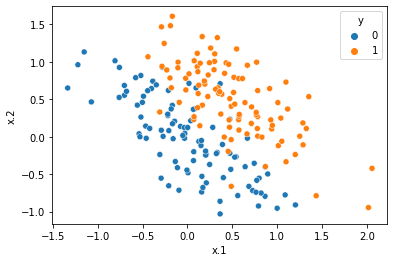

In [3]:
sn.scatterplot(data=data_all,x="x.1",y="x.2", hue="y");

### b)

Text(0, 0.5, 'correct predictions [%]')

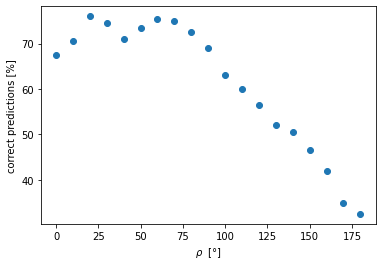

In [4]:
theta = 0
angles = np.linspace(0,180,19)

# project on both axes for each angle
weights = [(np.cos(a*np.pi/180), np.sin(a*np.pi/180)) for a in angles];

# binary transfer function
def bin_trans_fct(x):
    return 0 if x < 0 else 1

def get_predictions(data, weight_pair, theta):
    correct = []
    for index, row in data.iterrows():
        prediction = bin_trans_fct(row["x.1"]*weight_pair[0] + row["x.2"]*weight_pair[1] - theta)
        if prediction == row["y"]: # check if the prediction matches the label
            correct.append(1)
        else:
            correct.append(0)  
    return correct

percents_weights = []
for weight_pair in weights:
    correct = get_predictions(data_all, weight_pair, theta)
    percents_weights.append(100*sum(correct)/len(correct)) # calculate percentage of correct prediction for this set of weights

plt.plot(angles, percents_weights, 'o');
plt.xlabel(r"$ \rho \ $ [°]")
plt.ylabel('correct predictions [%]')

### c)

theta_best = 0.18367346938775508


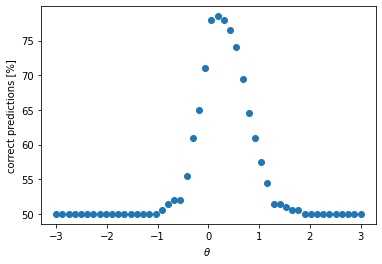

In [5]:
ind_best_weights = percents_weights.index(max(percents_weights)) # get the index of the pair with best performance
best_weights = weights[ind_best_weights]

thetas = np.linspace(-3, 3, 50)
percents_thetas = []
for theta in thetas:
    correct = get_predictions(data_all, best_weights, theta)
    percents_thetas.append(100*sum(correct)/len(correct)) # calculate percentage of correct prediction for this set of weights

plt.plot(thetas, percents_thetas, 'o')
plt.xlabel(r"$ \theta \ $ ")
plt.ylabel('correct predictions [%]')

ind_best_bias = percents_thetas.index(max(percents_thetas)) # get the index of the bias with best performance
best_bias = thetas[ind_best_bias]
print("theta_best =", best_bias)

### d)

       x.1    x.2  y  pred
0    0.365  0.708  0     1
1    0.543 -0.268  0     1
2   -0.401  0.643  0     0
3    0.866 -0.796  0     1
4   -0.386  0.742  0     0
..     ...    ... ..   ...
195  0.784  0.616  1     1
196  0.411 -0.005  1     1
197  0.930  0.225  1     1
198  1.288  0.184  1     1
199  0.110  1.114  1     1

[200 rows x 4 columns]


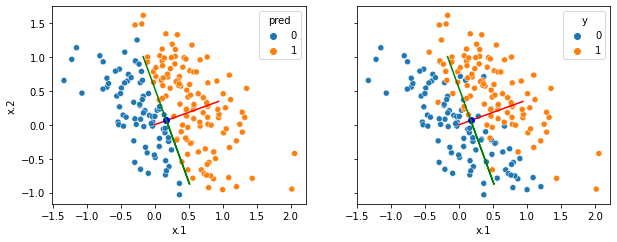

In [6]:
def make_predictions(data, weight_pair, theta):
    predictions = []
    for index, row in data.iterrows():
        predictions.append(bin_trans_fct(row["x.1"]*weight_pair[0] + row["x.2"]*weight_pair[1] - theta))
    return predictions 

def rotate_90(vec):
    rotated = np.matmul(np.array([[np.cos(np.pi/2), np.sin(np.pi/2)],
                       [-1*np.sin(np.pi/2), np.cos(np.pi/2)]]),
                        vec)
    return rotated

predictions = make_predictions(data_all, best_weights, best_bias)

data_all.insert(3, "pred", predictions)
print(data_all)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10, 10))
axes = (ax1, ax2)
hues = ["pred", "y"]

for c in range(0,2):
    axes[c].set_aspect('equal');
    sn.scatterplot(data=data_all,x="x.1",y="x.2", hue=hues[c], ax=axes[c])
    axes[c].plot([0, best_weights[0]], [0, best_weights[1]], 'r')

    theta_norm_w = np.array(best_weights).T*best_bias/np.linalg.norm(best_weights)
    axes[c].plot(theta_norm_w[0], theta_norm_w[1], 'bo')

    plane = rotate_90(best_weights)
    axes[c].plot([theta_norm_w[0], plane[0] + theta_norm_w[0], -plane[0] + theta_norm_w[0]], [theta_norm_w[1], plane[1] + theta_norm_w[1], -plane[1] + theta_norm_w[1]], 'g')

In the plot on the left you can see the predicted classes for the points and in the plot on the right you can see the actual classes. One can see that the weight and bias are not optimal. This is caused by the two-step process of identifying the "optimal" weights and bias. 

### e)

In [7]:
# search over 50 angles and 50 biases
N = 50
angles = np.linspace(0, 180, N)
weights = [(np.cos(a*np.pi/180), np.sin(a*np.pi/180)) for a in angles];
thetas = np.linspace(-3, 3, N)


#for ind, bias in enumerate(thetas[0:5]):
#   print(ind, " : ", bias)


# this takes like 10-20 sec to compute...
percents = np.zeros((N,N))
for ind_b, bias in enumerate(thetas):
    for ind_w, weight_pair in enumerate(weights):
        correct = get_predictions(data_all, weight_pair, bias)
        percents[ind_b, ind_w] = (100*sum(correct)/len(correct)) 

0  :  -3.0
1  :  -2.877551020408163
2  :  -2.7551020408163267
3  :  -2.63265306122449
4  :  -2.510204081632653


best %: [92.]
optimal bias:  [0.30612245]
optimal weights:  (0.7183493500977276, 0.6956825506034864)


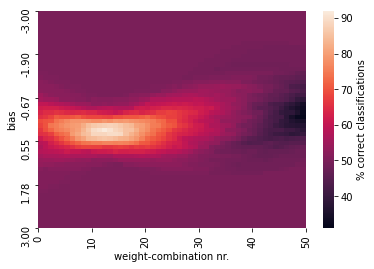

In [8]:
sn.heatmap(percents, cbar_kws={'label': '% correct classifications'});
plt.xlabel("weight-combination nr.")
plt.xticks(ticks=list(np.linspace(0, N, 6)), 
           labels=list(np.linspace(0, N, 6, dtype=int)))
plt.ylabel("bias")
plt.yticks(ticks=list(np.linspace(0,N,6)), 
           labels=["{:.2f}".format(x) for x in thetas[np.linspace(0, 49, 6, dtype=int)]])

result = np.where(percents == np.amax(percents))
print("best %:", percents[result[0], result[1]])
print("optimal bias: ", thetas[result[0]])
print("optimal weights: ", weights[result[1][0]])

In [9]:
predictions_opt = make_predictions(data_all, weights[result[1][0]], thetas[result[0]])
data_all.insert(3, "pred_opt", predictions_opt)

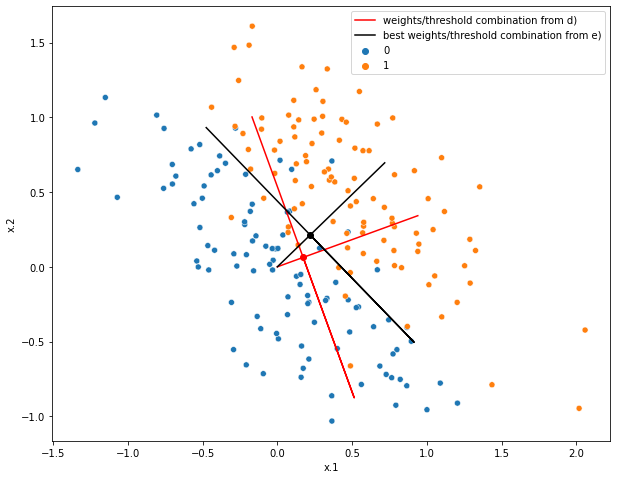

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.set_aspect('equal')
sn.scatterplot(data=data_all,x="x.1",y="x.2", hue="y", ax=ax)

bw = [best_weights, (weights[result[1][0]])]
bb = [best_bias, thetas[result[0]]]
colors = ['r', 'k']
labels = ['weights/threshold combination from d)', 'best weights/threshold combination from e)']
for c in range(0,2):
    ax.plot([0, bw[c][0]], [0, bw[c][1]], colors[c], label=labels[c])
    theta_norm_w = np.array(bw[c]).T*bb[c]/np.linalg.norm(bw[c])
    ax.plot(theta_norm_w[0], theta_norm_w[1], colors[c]+'o')
    plane = rotate_90(bw[c])
    ax.plot([theta_norm_w[0], plane[0] + theta_norm_w[0], -plane[0] + theta_norm_w[0]], [theta_norm_w[1], plane[1] + theta_norm_w[1], -plane[1] + theta_norm_w[1]], colors[c])
    ax.legend()


### f)

Grid search is easy to implement but not efficient when the number of parameters is large. As soon as a problem cannot be solved with a single layer perceptron, the number of possible combinations of all the weights and thresholds of the hidden layers gets very high and they cannot be computed with a grid search. 

## Exercise H2.2: Multilayer Perceptrons (MLP)
### a) 

In [11]:
def f(x):
    return np.tanh(x)

def y(MLP, x):
    y = [np.sum(MLP[0] * f(MLP[1] * x_i - MLP[2])) for x_i in x]
    return y

n = 10
#create weights                   
w_out = np.random.normal(0, 1,(50, n))
w_hidden = np.random.normal(0, 2, (50, n))
b = np.random.uniform(-2, 2, (50, n))
                  
#create 50 MLP, each one tupel of 3 vectors w_out, w_hidden, b_i with length 10                   
MLP_1 = [(w_out[j], w_hidden[j], b[j]) for j in range(50)]

### b)

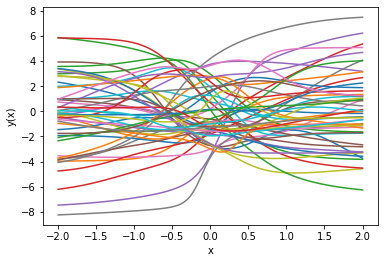

In [12]:
x = np.linspace(-2, 2, 100)
y_1 = [y(MLP_i, x) for MLP_i in MLP_1]

for y_i in y_1:
    plt.plot(x, y_i)
    plt.xlabel('x')
    plt.ylabel('y(x)')

### c)

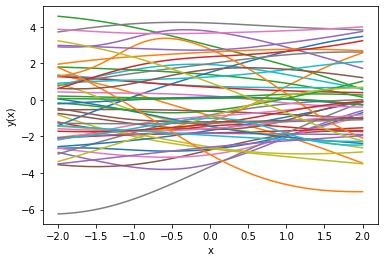

In [13]:
w_hidden = np.random.normal(0, 0.5, (50, n))
MLP_2 = [(w_out[j], w_hidden[j], b[j]) for j in range(50)]
y_2 = [y(MLP_i, x) for MLP_i in MLP_2]

for y_i in y_2:
    plt.plot(x, y_i)
    plt.xlabel('x')
    plt.ylabel('y(x)')

The input-output functions are less curved than in the first scenario.

### d)

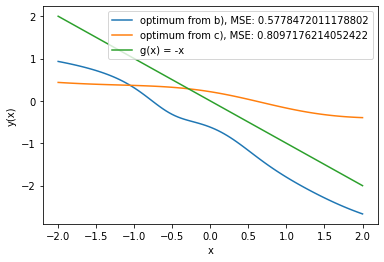

In [14]:
def g(x): 
    return -x

e_1 = [np.mean((g(x) - y_i) ** 2) for y_i in y_1]
min_e1 = min(e_1)
min_e1_i = (e_1.index(min(e_1)))

e_2 = [np.mean((g(x) - y_i) ** 2) for y_i in y_2]
min_e2 = min(e_2)
min_e2_i = (e_2.index(min(e_2)))

plt.plot(x, y_1[min_e1_i], label=("optimum from b), MSE: "+str(min_e1)))
plt.plot(x, y_2[min_e2_i], label=("optimum from c), MSE: "+str(min_e2)))
plt.plot(x, g(x), label='g(x) = -x')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()